## Girvan-Newman Algo for Community Detection

Consider a undirected & not weighted simple graph

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

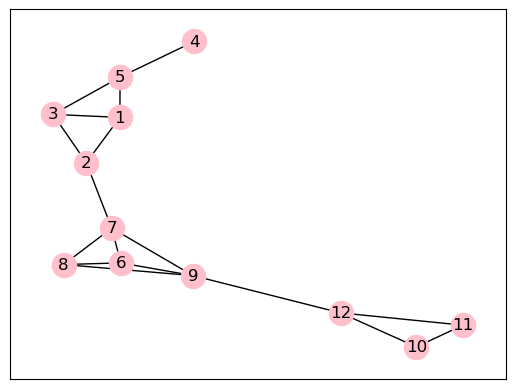

In [2]:
G = nx.Graph()
G.add_edges_from([[1,2], [2,3], [1,3], [4,5], [1,5], [3,5],
                  [6,7], [7,8], [8,9], [6,9], [6,8], [7,9],
                  [10,11], [11,12], [10,12],
                  [9,12], [2,7]])
nx.draw_networkx(G, with_labels=True, node_color='pink')

## An example, edge betweeness for edge 2_7:

## Things to consider:
### numerator: how many shortest paths go through 2_7? (35)
### denominator: how many showrtest paths in total? (66)

In [3]:
#12 choose 2, equals to 66
TOT_PAIRS = (12*11)/2 #denominator

35 / TOT_PAIRS 


#### For any two nodes, how many nodes have the shortest path that have to pass a given edge e?
Example: edge 2_7; Since it is a cut-edge, 5*7 = 35



In [5]:
35 / TOT_PAIRS

0.5303030303030303

In [6]:
nx.edge_betweenness_centrality(G)

{(1, 2): 0.24242424242424243,
 (1, 3): 0.015151515151515152,
 (1, 5): 0.15151515151515152,
 (2, 3): 0.24242424242424243,
 (2, 7): 0.5303030303030303,
 (3, 5): 0.15151515151515152,
 (4, 5): 0.16666666666666669,
 (6, 7): 0.09090909090909091,
 (6, 9): 0.06060606060606061,
 (6, 8): 0.015151515151515152,
 (7, 8): 0.09090909090909091,
 (7, 9): 0.36363636363636365,
 (8, 9): 0.06060606060606061,
 (9, 12): 0.4090909090909091,
 (10, 11): 0.015151515151515152,
 (10, 12): 0.15151515151515152,
 (11, 12): 0.15151515151515152}

In [13]:
edge_betwenness = nx.edge_betweenness_centrality(G).items()
sorted(edge_betwenness, key=lambda pair: -pair[1])[0][0]

(2, 7)

## If we are trying to detect community, which edges are we interested in?
### ANS: Edges with the highest edge_betweenness; Such edges are holding one community with the rest of the network. For edges with a lower edge betweenness (e.g. 1_3).


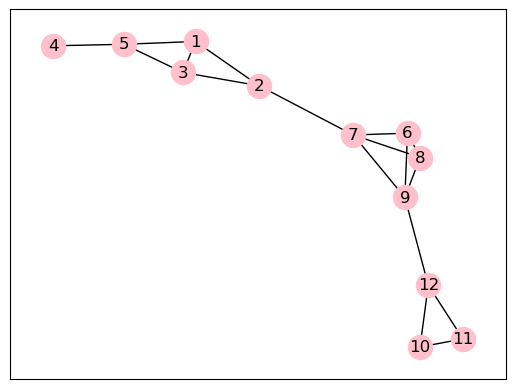

In [7]:
nx.draw_networkx(G, with_labels=True, node_color='pink')

## What's Next? 🤔
### 1. Looking for the edge with the highest "edge betweenness" and delete that edge; separating the community with the rest of the network.
### 2. Recompute all edge betweenness and redo step 1!


In [8]:
#sort from the highest to the lowest; sort in descending order using the second element of each pair
sorted(nx.edge_betweenness_centrality(G).items(), key = lambda pair: -pair[1] )

[((2, 7), 0.5303030303030303),
 ((9, 12), 0.4090909090909091),
 ((7, 9), 0.36363636363636365),
 ((1, 2), 0.24242424242424243),
 ((2, 3), 0.24242424242424243),
 ((4, 5), 0.16666666666666669),
 ((1, 5), 0.15151515151515152),
 ((3, 5), 0.15151515151515152),
 ((10, 12), 0.15151515151515152),
 ((11, 12), 0.15151515151515152),
 ((6, 7), 0.09090909090909091),
 ((7, 8), 0.09090909090909091),
 ((6, 9), 0.06060606060606061),
 ((8, 9), 0.06060606060606061),
 ((1, 3), 0.015151515151515152),
 ((6, 8), 0.015151515151515152),
 ((10, 11), 0.015151515151515152)]

## Intuitively, we are liberating communities from the entire network. Now, let's try it!

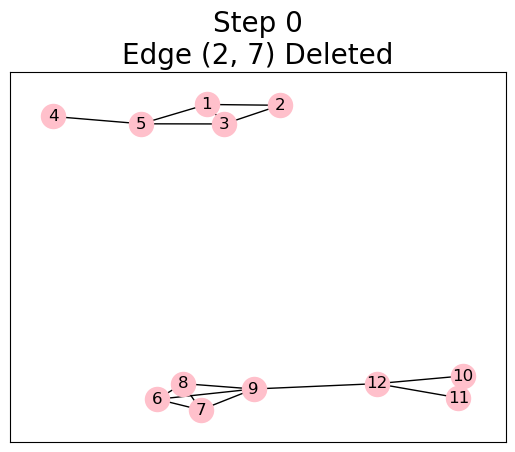

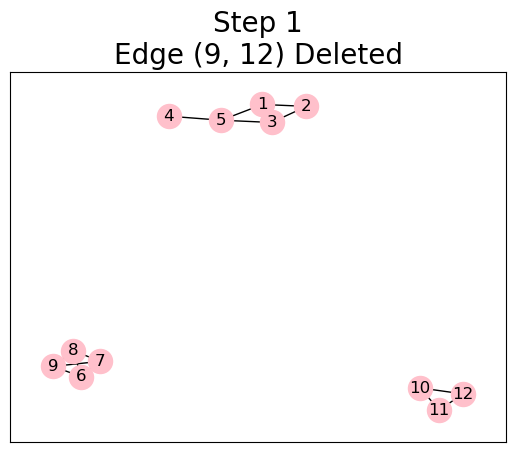

In [9]:
NUM_ITERATIONS = 2
for i in range(NUM_ITERATIONS):
    edge_betweenness = nx.edge_betweenness_centrality(G).items()
    edge_to_delete = sorted(edge_betweenness, key=lambda pair: -pair[1])[0][0]
    #remove the one with the highest edge betweenness
    G.remove_edge(*edge_to_delete)
    
    nx.draw_networkx(G, with_labels=True, node_color='pink')
    plt.title('Step %s\nEdge %s Deleted'%(i, edge_to_delete), fontsize=20)
    
    plt.show()

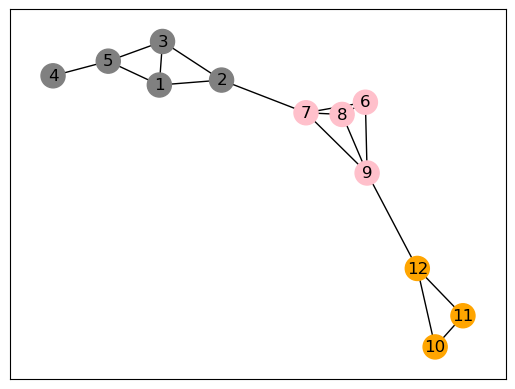

In [12]:
G = nx.Graph()
# define a graph. Here, G is a simple unweighted, undirected graph
G.add_edges_from([[1,2], [2,3], [1,3], [4,5], [1,5], [3,5],
                  [6,7], [7,8], [8,9], [6,9], [6,8], [7,9],
                  [10,11], [11,12], [10,12],
                  [9,12], [2,7]])
def edge_to_remove(graph):
    G_dict = nx.edge_betweenness_centrality(graph)
    edge = ()

    # extract the edge with highest edge betweenness centrality score
    for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse=True):
        edge = key
        break

    return edge


def girvan_newman(graph):
    # find number of connected components
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)

    while sg_count <= 2:
        graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)

    return sg


# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
    node_groups.append(list(i))

# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('grey')
    elif node in node_groups[1]:
        color_map.append('pink')
    elif node in node_groups[2]:
        color_map.append('orange')
    else:
        color_map.append('lightblue')

nx.draw_networkx(G, node_color=color_map, with_labels=True)
plt.show()



## Application and Result

In [ ]:
#G = nx.Graph()
G = nx.MultiDiGraph()
G.add_edges_from([['Am','Dm'], ['Dm','E7'], ['E7','Am'],['Am','F'], ['Am','E'], ['Am','C'],['C','G'], 
                  ['C','Dm'], ['Dm','E'],['E','E7'], ['F','C'], ['G7','C'],
                  ['G','C'], ['G','G7'], ['F','G'],['C','F']])
nx.draw_networkx(G, with_labels=True, node_color='pink')


pop_edge = [('C', 'Am'), ('Am', 'F'), ('F', 'G'),('G','F'),('Am','G'),('G','C')]
jazz_edge =[('Am7', 'A7'), ('Am', 'A7'), ('A7', 'Dm7'),('Am','Dm7'),('Dm7','G7'),
            ('A7', 'Am'),('Am','Dm'),('Dm','G7'),('G7','CM7'),('CM7','FM7'),('FM7','Esus'),('FM7','Bdim'),
           ('Bdim','Ddim'),('Ddim','E7'),('E7','Am7'),('CM7','E7'),('Esus','A7')] 
hbd_edge = [('C', 'G'), ('G', 'C'), ('C', 'F'),('F','C'),('C','G7'),('G7','C'),('F','G')]

G.add_edges_from(pop_edge)
G.add_edges_from(hbd_edge)
G.add_edges_from(jazz_edge)


nx.draw_networkx(G, with_labels=True, node_color='pink')



In [ ]:
hbd_edge = [('C', 'G'), ('G', 'C'), ('C', 'F'),('F','C'),('F','G')]
S = nx.MultiDiGraph()
S.add_edges_from(hbd_edge)
nx.draw_networkx(S, with_labels=True, node_color='pink')





In [ ]:
hbd_edge = [('C', 'G'), ('G', 'C'), ('C', 'F'),('F','C'),('C','G7'),('G7','C'),('F','G')]
S = nx.MultiDiGraph()
S.add_edges_from(hbd_edge)
nx.draw_networkx(S, with_labels=True, node_color='pink')





In [ ]:

# Create a graph
G = nx.Graph()

# Add edges with weights
G.add_edges_from([['Am','Dm', {'weight': 1}], ['Dm','E7', {'weight': 1}], ['E7','Am',{'weight': 1}],
                  ['Am','F',{'weight': 1}], ['Am','E',{'weight': 1}], ['Am','C',{'weight': 1}],
                  ['C','G',{'weight': 1}], ['C','Dm',{'weight': 1}], ['Dm','E',{'weight': 1}],
                  ['E','E7',{'weight': 1}], ['F','C',{'weight': 1}], ['G7','C',{'weight': 1}],
                  ['G','C',{'weight': 1}], ['G','G7',{'weight': 1}], ['F','G',{'weight': 1}]])

# Add more edges
pop_edge = [('C', 'Am', {'weight': 1}), ('Am', 'F', {'weight': 1}), ('F', 'G', {'weight': 1}),         
            ('G', 'F', {'weight': 1}), ('Am', 'G', {'weight': 1}), ('G', 'C', {'weight': 1})]
jazz_edge =[('Am7', 'A7', {'weight': 1}), ('Am', 'A7', {'weight': 1}), ('A7', 'Dm7', {'weight':1}), 
            ('Am','Dm7', {'weight': 1}), ('Dm7','G7', {'weight': 1}), ('A7', 'Am', {'weight': 1}),      
            ('Am','Dm', {'weight': 1}), ('Dm','G7', {'weight': 1}), ('G7','CM7', {'weight': 1}),       
            ('CM7','FM7', {'weight': 1}), ('FM7','Esus', {'weight': 1}), ('FM7','Bdim', {'weight': 1}),          
            ('Bdim','Ddim', {'weight': 1}), ('Ddim','E7', {'weight': 1}), ('E7','Am7', {'weight': 1}),         
            ('CM7','E7', {'weight': 1}), ('Esus','A7', {'weight': 1})]
hbd_edge = [('C', 'G', {'weight': 1}), ('G', 'C', {'weight': 1}), ('C', 'F', {'weight': 1}),        
            ('F','C', {'weight': 1}), ('C','G7', {'weight': 1}), ('G7','C', {'weight': 1}),         
            ('F','G', {'weight': 1})]


def add_edge_with_auto_weight(u, v):
    count = 0
    if (u, v) in weights:
        weight = weights[(u, v)] + 1
    else:
        weight = 1
    G.add_edge(u, v, weight=weight)
    weights[(u, v)] = weight

G.add_edges_from(pop_edge)
G.add_edges_from(hbd_edge)
G.add_edges_from(jazz_edge)

# Draw the graph with edge labels
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
plt.show()


In [ ]:
G = nx.Graph()
G.add_edges_from([['Am','Dm'], ['Dm','E7'], ['E7','Am'],['Am','F'], ['Am','E'], ['Am','C'],['C','G'], 
                  ['C','Dm'], ['Dm','E'],['E','E7'], ['F','C'], ['G7','C'],
                  ['G','C'], ['G','G7'], ['F','G'],['C','F'],['C', 'Am'], ['Am', 'F'], ['F', 'G'],['G','F'],['Am','G'],['G','C']
                 ,['Am7', 'A7'], ['Am', 'A7'], ['A7', 'Dm7'],['Am','Dm7'],['Dm7','G7'],
            ['A7', 'Am'],['Am','Dm'],['Dm','G7'],['G7','CM7'],['CM7','FM7'],['FM7','Esus'],['FM7','Bdim'],
           ['Bdim','Ddim'],['Ddim','E7'],['E7','Am7'],['CM7','E7'],['Esus','A7']])
nx.draw_networkx(G, with_labels=True, node_color='pink')


jazz_edge =[['Am7', 'A7'], ['Am', 'A7'], ['A7', 'Dm7'],['Am','Dm7'],['Dm7','G7'],
            ['A7', 'Am'],['Am','Dm'],['Dm','G7'],['G7','CM7'],['CM7','FM7'],['FM7','Esus'],['FM7','Bdim'],
           ['Bdim','Ddim'],['Ddim','E7'],['E7','Am7'],['CM7','E7'],['Esus','A7']] 
hbd_edge = [('C', 'G'), ('G', 'C'), ('C', 'F'),('F','C'),('C','G7'),('G7','C'),('F','G')]

G.add_edges_from(pop_edge)
G.add_edges_from(hbd_edge)
G.add_edges_from(jazz_edge)


nx.draw_networkx(G, with_labels=True, node_color='pink')




In [ ]:
G = nx.Graph()
G.add_edges_from([['Am','Dm'], ['Dm','E7'], ['E7','Am'],['Am','F'], ['Am','E'], ['Am','C'],['C','G'], 
                  ['C','Dm'], ['Dm','E'],['E','E7'], ['F','C'], ['G7','C'],
                  ['G','C'], ['G','G7'], ['F','G'],['C','F']])
nx.draw_networkx(G, with_labels=True, node_color='pink')


pop_edge = [('C', 'Am'), ('Am', 'F'), ('F', 'G'),('G','F'),('Am','G'),('G','C')]
jazz_edge =[('Am7', 'A7'), ('Am', 'A7'), ('A7', 'Dm7'),('Am','Dm7'),('Dm7','G7'),
            ('A7', 'Am'),('Am','Dm'),('Dm','G7'),('G7','CM7'),('CM7','FM7'),('FM7','Esus'),('FM7','Bdim'),
           ('Bdim','Ddim'),('Ddim','E7'),('E7','Am7'),('CM7','E7'),('Esus','A7')] 
hbd_edge = [('C', 'G'), ('G', 'C'), ('C', 'F'),('F','C'),('C','G7'),('G7','C'),('F','G')]

G.add_edges_from(pop_edge)
G.add_edges_from(hbd_edge)
G.add_edges_from(jazz_edge)


nx.draw_networkx(G, with_labels=True, node_color='pink')



In [ ]:
def edge_to_remove(graph):
    G_dict = nx.edge_betweenness_centrality(graph)
    edge = ()

    # extract the edge with highest edge betweenness centrality score
    for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse=True):
        edge = key
        break

    return edge


def girvan_newman(graph):
    # find number of connected components
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)

    while sg_count <= 3:
        graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)

    return sg


# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
    node_groups.append(list(i))

# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('grey')
    elif node in node_groups[1]:
        color_map.append('pink')
    elif node in node_groups[2]:
        color_map.append('orange')
    else:
        color_map.append('lightblue')

nx.draw_networkx(G, node_color=color_map, with_labels=True)
plt.show()


In [ ]:
def edge_to_remove(graph):
    G_dict = nx.edge_betweenness_centrality(graph)
    edge = ()

    # extract the edge with highest edge betweenness centrality score
    for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse=True):
        edge = key
        break

    return edge


def girvan_newman(graph):
    # find number of connected components
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)

    while sg_count <= 4:
        graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)

    return sg


# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
    node_groups.append(list(i))

# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('grey')
    elif node in node_groups[1]:
        color_map.append('pink')
    elif node in node_groups[2]:
        color_map.append('orange')
    else:
        color_map.append('lightblue')

nx.draw_networkx(G, node_color=color_map, with_labels=True)
plt.show()



In [ ]:
NUM_ITERATIONS = 5
for i in range(NUM_ITERATIONS):
    edge_betweenness = nx.edge_betweenness_centrality(G).items()
    edge_to_delete = sorted(edge_betweenness, key=lambda pair: -pair[1])[0][0]
    #remove the one with the highest edge betweenness
    G.remove_edge(*edge_to_delete)
    
    nx.draw_networkx(G, with_labels=True, node_color='pink')
    plt.title('Step %s\nEdge %s Deleted'%(i, edge_to_delete), fontsize=20)
    
    plt.show()

### Agglomerative Clustering

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

# create a sample dataset
X = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

# calculate pairwise distances between all data points
dist_matrix = squareform(pdist(X))

# perform hierarchical clustering with ward linkage
model = AgglomerativeClustering(n_clusters=2, linkage='ward')
model.fit(dist_matrix)

# plot the original dataset
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')


In [ ]:
import numpy as np

# generate some sample chord progressions
chord_progressions = np.array([
    ['C', 'Am', 'F', 'G'],
    ['C', 'Am', 'F', 'G7'],
    ['G', 'D7', 'Am7', 'D7'],
    ['G', 'D7', 'Am7', 'D7b9'],
    ['C', 'E7', 'Am', 'F'],
    ['G', 'Am7', 'Bm7b5', 'C6'],
])

# randomly select a chord progression
random_chord_progression = chord_progressions[np.random.choice(chord_progressions.shape[0])]

# print the selected chord progression
if len(random_chord_progression) > 0:
    print(random_chord_progression)
else:
    print("No chord progression found.")


### Modularity

In [ ]:
G = nx.MultiDiGraph()

# Add edges with weights
weights = {}

# add edges with auto weights based on the number of edges between two nodes
def add_edge_with_auto_weight(u, v):
    count = 0
    if (u, v) in weights:
        weight = weights[(u, v)] + 1
    else:
        weight = 1
    G.add_edge(u, v, weight=weight)
    weights[(u, v)] = weight

add_edge_with_auto_weight('C', 'F')
add_edge_with_auto_weight('F', 'C')
add_edge_with_auto_weight('C', 'G')
add_edge_with_auto_weight('G', 'C')
add_edge_with_auto_weight('F', 'G')
add_edge_with_auto_weight('C', 'F')
add_edge_with_auto_weight('F', 'C')
add_edge_with_auto_weight('C', 'G')
add_edge_with_auto_weight('G', 'C')
add_edge_with_auto_weight('F', 'G')
add_edge_with_auto_weight('C', 'G7')

# Draw the graph with edge labels
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()
G.add_edges_from([['Am','Dm'], ['Dm','E7'], ['E7','Am'],['Am','F'], ['Am','E'], ['Am','C'],['C','G'], 
                  ['C','Dm'], ['Dm','E'],['E','E7'], ['F','C'], ['G7','C'],
                  ['G','C'], ['G','G7'], ['F','G'],['C','F']])
pop_edge = [('C', 'Am'), ('Am', 'F'), ('F', 'G'),('G','F'),('Am','G'),('G','C')]
jazz_edge =[('Am7', 'A7'), ('Am', 'A7'), ('A7', 'Dm7'),('Am','Dm7'),('Dm7','G7'),            ('A7', 'Am'),('Am','Dm'),('Dm','G7'),('G7','CM7'),('CM7','FM7'),('FM7','Esus'),('FM7','Bdim'),           ('Bdim','Ddim'),('Ddim','E7'),('E7','Am7'),('CM7','E7'),('Esus','A7')] 
hbd_edge = [('C', 'G'), ('G', 'C'), ('C', 'F'),('F','C'),('C','G7'),('G7','C'),('F','G')]

G.add_edges_from(pop_edge)
G.add_edges_from(hbd_edge)
G.add_edges_from(jazz_edge)

# Find communities using Label Propagation algorithm with different initial labels
communities = []
initial_labels = {'Am': 0, 'C': 1, 'G': 2, 'F': 3}
for node, label in initial_labels.items():
    c = {n for n, l in nx.algorithms.community.label_propagation.asyn_label_propagation(G, initial_label=label)}
    communities.append(c)

# Plot disjoint communities
pos = nx.spring_layout(G)
colors = ['r', 'b', 'g', 'y', 'm', 'c']
for i, c in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=list(c), node_color=colors[i])
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()


In [ ]:
num_communities = len(communities)
num_communities


In [ ]:
import networkx as nx

# create an empty directed multigraph
G = nx.MultiDiGraph()

# initialize a dictionary to store the edge weights
weights = {}

# add edges with auto weights based on the number of edges between two nodes
def add_edge_with_auto_weight(u, v):
    count = 0
    if (u, v) in weights:
        weight = weights[(u, v)] + 1
    else:
        weight = 1
    G.add_edge(u, v, weight=weight)
    weights[(u, v)] = weight

add_edge_with_auto_weight('C', 'F')
add_edge_with_auto_weight('F', 'C')
add_edge_with_auto_weight('C', 'G')
add_edge_with_auto_weight('G', 'C')
add_edge_with_auto_weight('F', 'G')
add_edge_with_auto_weight('C', 'F')
add_edge_with_auto_weight('F', 'C')
add_edge_with_auto_weight('C', 'G')
add_edge_with_auto_weight('G', 'C')
add_edge_with_auto_weight('F', 'G')
add_edge_with_auto_weight('C', 'G7')

# print the edges and their weights
for u, v, w in G.edges(data='weight'):
    print(f"{u} -> {v}: weight = {w}")
nx.draw_networkx(G)
